In [ ]:
#To check the downsampling error
#calculate the Mean Square Error (MSE) for different sampling rates after downsampling, 
#and then compare them using a graph


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#Load the csv file and use only one sensor data to downasmaple and chek the 
file_path = '/Users/thomas/Desktop/phd_unipv/Industrial_PhD/Technical_documentation/20240707/csv_acc/VI09_2024-07-07_00-00-00_gg-44_int-1_th.csv'

original_df = pd.read_csv(file_path, sep=';')

original_df['time'] = pd.to_datetime(original_df['time'], format='%Y/%m/%d %H:%M:%S:%f')

#original_df = original_df.set_index('time')


In [55]:
original_df.head()


,time;03067802_z;03067806_z;03067807_z;03067809_z;0306780C_z;0306780D_z;0306781A_z;03067820_z;03067826_z;0306782A_z;0306782E_z;03067831_z;03067833_z;03067834_z;03067836_z;0306783A_z;0306783C_z;0306783E_z;0306783F_z;03067842_z;03067848_z;0306784E_z;03067852_z;03067854_z;03067865_z;03067873_z;03067878_z;0306787C_z;03067884_z;03067886_z;03067888_z;0306788A_z;03067897_z;0306789F_z;030678A3_z;030678A9_z;030678AD_z;030678B0_z;030678B2_z;030678BD_z;030678C4_z;030678CB_z;030678D1_z;030678D7_z;030678D8_z;030678E1_z;030678E2_z;030678E4_z;030678E7_z;030678E9_z;030678EA_z;030678EC_z;030678F0_z;030678F3_z;030678F6_z;03067918_z;0306791E_z;03067921_z;03067923_z;03067938_z;03067939_z;0306794B_z;0306794D_z;03067952_z;03067954_z;03067958_z;0306795C_z;03067971_z;03067973_z;03067974_z;03067977_z;03067978_z;03067979_z;0306797B_z;0306797F_z;0306798B_z;0306798D_z;030679A2_z;030679B7_z;030679BA_z;030679BC_z;030679CB_z;030679CD_z;030679CE_z;030679D3_z;030679D6_z;030679F7_z;030679FB_z;03067A1B_z;03067A24_z;03067A30_z;03067A32_z;03067A37_z;03067A46_z;03067A5A_z;03067A5D_z;03067A79_z;03067A7D_z;03067AB3_z;03067AB4_z;03067AB8_z;03067AB9_z;0306807F_z;030680B5_z;030680D0_z;03068174_z
0,2024/07/07 00:00:00:000;1.006763;1.009129;1.01...
1,2024/07/07 00:00:00:005;1.00876;1.009358;1.011...
2,2024/07/07 00:00:00:010;1.009201;1.009518;1.01...
3,2024/07/07 00:00:00:015;1.008846;1.009591;1.01...
4,2024/07/07 00:00:00:020;1.00769;1.0096;1.01072...


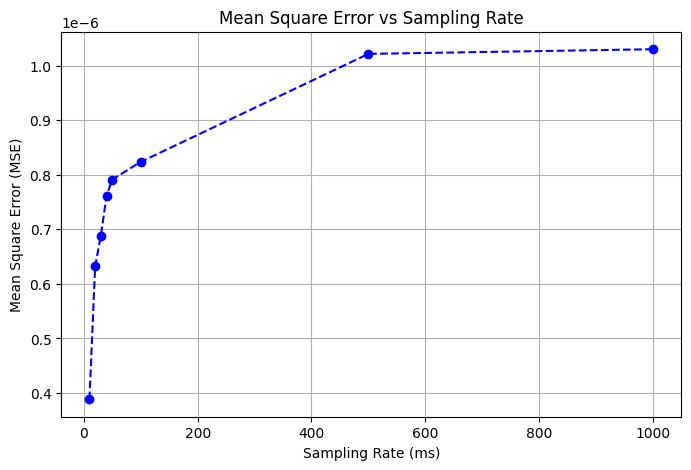

[3.8858892530867086e-07, 6.318862865745188e-07, 6.881471964773081e-07, 7.612734515279574e-07, 7.911947978067184e-07, 8.234521379876274e-07, 1.0214087532009054e-06, 1.0299671230165793e-06]
Sampling Rate: 10 ms, MSE: 0.00000039
Sampling Rate: 20 ms, MSE: 0.00000063
Sampling Rate: 30 ms, MSE: 0.00000069
Sampling Rate: 40 ms, MSE: 0.00000076
Sampling Rate: 50 ms, MSE: 0.00000079
Sampling Rate: 100 ms, MSE: 0.00000082
Sampling Rate: 500 ms, MSE: 0.00000102
Sampling Rate: 1000 ms, MSE: 0.00000103


In [43]:

# Define sampling rates to test (in milliseconds)
sampling_rates_ms = [10, 20, 30, 40, 50, 100, 500, 1000]  # Downsample to 10ms, 20ms, 50ms, and 100ms
mse_values = []

# Interpolate the original signal for comparison
original_time = original_df['time']
original_values = original_df['03067802_z']

for rate_ms in sampling_rates_ms:
    # Downsample the signal
    downsampled_time = original_time[::rate_ms // 5]
    downsampled_values = original_values[::rate_ms // 5]

    # Interpolate the downsampled signal back to the original time resolution
    interpolator = interp1d(downsampled_time.astype(np.int64), downsampled_values, kind='linear', fill_value="extrapolate")
    interpolated_values = interpolator(original_time.astype(np.int64))

    # Calculate Mean Square Error (MSE)
    mse = np.mean((original_values - interpolated_values) ** 2)
    mse_values.append(mse)

# Plot the MSE against sampling rates
plt.figure(figsize=(8, 5))
plt.plot(sampling_rates_ms, mse_values, marker='o', linestyle='--', color='b')
plt.title("Mean Square Error vs Sampling Rate")
plt.xlabel("Sampling Rate (ms)")
plt.ylabel("Mean Square Error (MSE)")
plt.grid()
plt.show()


print(mse_values)
# Print MSE values for reference
for rate, mse in zip(sampling_rates_ms, mse_values):
    print(f"Sampling Rate: {rate} ms, MSE: {mse:.8f}")

In [44]:
variance = np.var(original_values)
nmse_values = [mse / variance for mse in mse_values]

In [45]:
for rate, mse in zip(sampling_rates_ms, mse_values):
    print(f"Sampling Rate: {rate} ms, MSE: {mse:.8f}")

Sampling Rate: 10 ms, MSE: 0.00000039
Sampling Rate: 20 ms, MSE: 0.00000063
Sampling Rate: 30 ms, MSE: 0.00000069
Sampling Rate: 40 ms, MSE: 0.00000076
Sampling Rate: 50 ms, MSE: 0.00000079
Sampling Rate: 100 ms, MSE: 0.00000082
Sampling Rate: 500 ms, MSE: 0.00000102
Sampling Rate: 1000 ms, MSE: 0.00000103


In [46]:
# **Signal-to-Noise Ratio (SNR) Calculation**
signal_power = np.mean(original_values**2)
snr_values = [10 * np.log10(signal_power / mse) for mse in mse_values]

# Print SNR values
for rate, snr in zip(sampling_rates_ms, snr_values):
    print(f"Sampling Rate: {rate} ms, SNR: {snr:.2f} dB")

Sampling Rate: 10 ms, SNR: 64.17 dB
Sampling Rate: 20 ms, SNR: 62.06 dB
Sampling Rate: 30 ms, SNR: 61.69 dB
Sampling Rate: 40 ms, SNR: 61.25 dB
Sampling Rate: 50 ms, SNR: 61.08 dB
Sampling Rate: 100 ms, SNR: 60.91 dB
Sampling Rate: 500 ms, SNR: 59.98 dB
Sampling Rate: 1000 ms, SNR: 59.94 dB


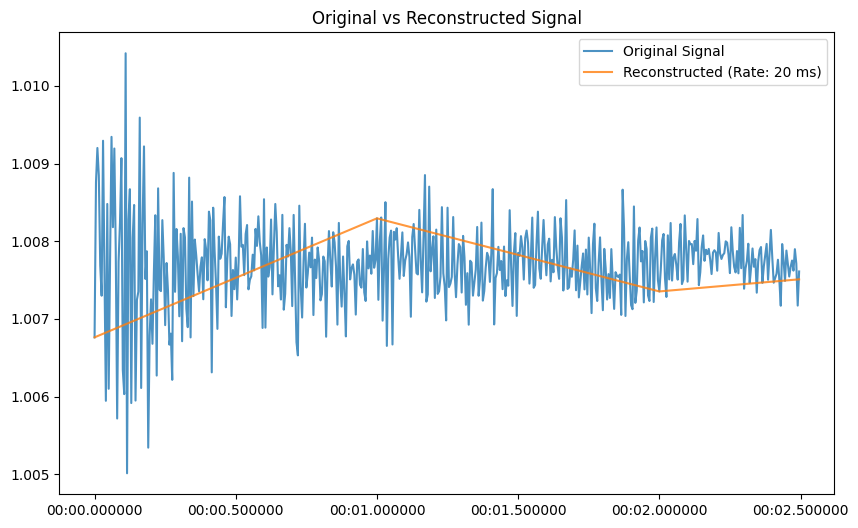

In [49]:
rate_to_visualize = 20 

plt.figure(figsize=(10, 6))
plt.plot(original_time[:500], original_values[:500], label='Original Signal', alpha=0.8)
plt.plot(original_time[:500], interpolated_values[:500], label=f'Reconstructed (Rate: {rate_to_visualize} ms)', alpha=0.8)
plt.title("Original vs Reconstructed Signal")
plt.legend()
plt.show()



In [52]:
from scipy.fft import fft, ifft



In [53]:
fft_result = fft(original_values)
frequencies = np.fft.fftfreq(len(original_values), d=0.005)  # Frequency bins (sampling interval = 5ms)

# Visualize the FFT spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies) // 2], np.abs(fft_result)[:len(frequencies) // 2])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Filter high frequencies (low-pass filter)
threshold_freq = 50  # Set a cutoff frequency (e.g., 10 Hz)
filtered_fft = fft_result.copy()
filtered_fft[np.abs(frequencies) > threshold_freq] = 0  # Zero out frequencies above threshold

# Perform Inverse FFT to reconstruct the signal
reconstructed_signal = ifft(filtered_fft).real

# Calculate MSE between original and reconstructed signal
mse = np.mean((original_values - reconstructed_signal) ** 2)
print(f"Mean Square Error (MSE): {mse:.6f}")

# Visualize the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(original_time, original_values, label='Original Signal', alpha=0.8)
plt.plot(original_time, reconstructed_signal, label='Reconstructed Signal (FFT)', linestyle='--', alpha=0.8)
plt.title("Original vs Reconstructed Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

KeyError: 'ALIGNED'